### Задача регрессии

In [31]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, linear_model, metrics, datasets
from matplotlib import pylab
import numpy as np

### Линейная регрессия
#### Генерация данных


In [32]:
data, target, cof = datasets.make_regression(n_features=2, n_informative=1,
                                    n_targets=1, noise=5, coef=True, random_state=2)

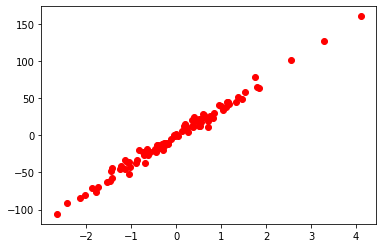

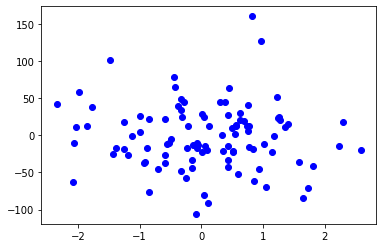

In [33]:
pylab.scatter(list(map(lambda x: x[0], data)), target, color='r')
pylab.plt.show()
pylab.scatter(list(map(lambda x: x[1], data)), target, color='blue')
pylab.plt.show()

In [34]:
train_data, test_data, train_target, test_target = model_selection.train_test_split(data, target, test_size=0.3, random_state=1)

#### LinearRegression

In [35]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(train_data, train_target)
linear_answer = linear_regression.predict(test_data)
print('TEST DATA')
print(test_target)
print('LINEAR APPROX')
print(linear_answer)

TEST DATA
[-105.77758163   38.36241814   64.19559505   22.13032804   41.1068411
  -11.18242389   49.41686419   34.35183007  -10.27758354  -27.02798161
   13.31981235   27.83791274   64.70214251   12.47089016  -21.48288019
   45.05465366    5.86887774   41.95683853  160.09441244  -70.11132234
  -21.47606913   12.42286854  -19.36956003   44.66274342  -57.46293828
  -71.3715844   -19.16792315  -16.79027112  -80.80239408  -16.65927231]
LINEAR APPROX
[-102.08731432   41.75791534   70.30776568   20.29924507   36.90337067
  -12.79770679   55.9654988    39.31388224   -7.44398949  -24.9817205
   14.6587114    23.35833719   68.38408718   20.17159391  -24.30982582
   42.58326287    4.87255646   44.03463444  157.53793198  -66.40747561
  -17.74553868    6.93548541  -31.89889217   51.11352352  -54.60429128
  -71.16643712  -10.9598118   -14.57744658  -78.31984997  -14.41232824]


In [36]:
metrics.mean_absolute_error(test_target, linear_answer)

3.84948204462547

#### Регрессия кросс-валидация

In [37]:
linear_scoring = model_selection.cross_val_score(linear_regression, data,
                                                 target, scoring='neg_mean_absolute_error', cv=10)
print('mean {}, std:{}'.format(linear_scoring.mean(), linear_scoring.std()))

mean -4.070071498779696, std:1.07371044928902


### Own scoring_method

In [38]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=True)
linear_scoring = model_selection.cross_val_score(linear_regression, data, target,
                                                 scoring=scorer, cv=10)
print('mean:{}, std:{}'.format(linear_scoring.mean(), linear_scoring.std()))

mean:4.070071498779696, std:1.07371044928902


In [39]:
print('COFF:')
print(cof)
print('PREDICT COFF:')
print(linear_regression.coef_)

COFF:
[38.07925837  0.        ]
PREDICT COFF:
[38.31554726  0.32893633]


### Метод регрессии Lasso

In [40]:
data, target, cof = datasets.make_regression(n_features=2, n_informative=1,
                                             n_targets=1, noise=5, coef=True, random_state=2)
lasso_regression = linear_model.Lasso(random_state=3)
lasso_regression.fit(train_data, train_target)
predict = lasso_regression.predict(test_data)
print('REAL TEST TARGET:')
print(test_target)
print('PREDICT TARGET:')
print(predict)

REAL TEST TARGET:
[-105.77758163   38.36241814   64.19559505   22.13032804   41.1068411
  -11.18242389   49.41686419   34.35183007  -10.27758354  -27.02798161
   13.31981235   27.83791274   64.70214251   12.47089016  -21.48288019
   45.05465366    5.86887774   41.95683853  160.09441244  -70.11132234
  -21.47606913   12.42286854  -19.36956003   44.66274342  -57.46293828
  -71.3715844   -19.16792315  -16.79027112  -80.80239408  -16.65927231]
PREDICT TARGET:
[-99.50127715  41.13394759  68.23366953  19.85968631  35.59744329
 -12.38683754  54.51364015  38.2935399   -7.32728979 -24.05255244
  13.9936387   22.51244381  66.63871574  19.30880646 -23.94150588
  41.46023314   4.40139974  43.53676796 153.07023927 -65.11338875
 -17.49771043   6.47574757 -31.19815655  49.58352965 -53.20348288
 -69.96958437 -11.60453946 -14.27585201 -76.39690171 -13.85825455]


In [42]:
metrics.mean_absolute_error(test_target,predict)

4.085051543335123

In [44]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=True)
lasso_scoring = model_selection.cross_val_score(lasso_regression, data, target, scoring=scorer,
                                                cv=10)
print('mean:{}, std:{}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean:4.1544782466663985, std:1.0170354384993352


In [45]:
print('REAL COFFS:')
print(cof)
print('PREDICT COFFS:')
print(lasso_regression.coef_)

REAL COFFS:
[38.07925837  0.        ]
PREDICT COFFS:
[37.31770306  0.        ]
